         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
Accuracy: 0.6798780487804879
[[366  46]
 [164  80]]
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       41

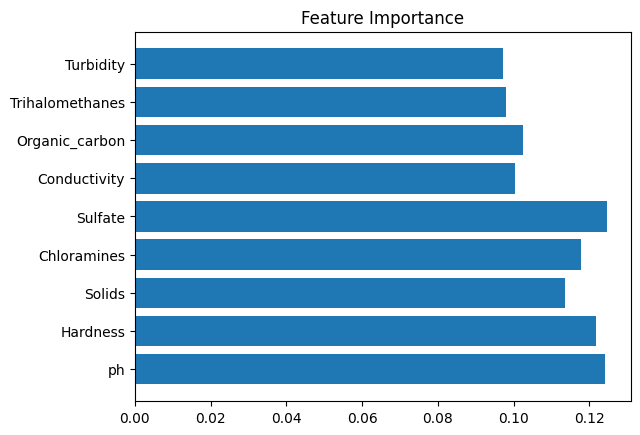

Sample Prediction: [0]


C:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# load dataset
df = pd.read_csv("water_potability.csv")

print(df.head())

# split features/target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# fill missing values
imp = SimpleImputer(strategy="mean")
X = pd.DataFrame(imp.fit_transform(X), columns=X.columns)

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# model
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)

# predictions
pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# feature importance graph
plt.barh(X.columns, model.feature_importances_)
plt.title("Feature Importance")
plt.show()

# sample prediction
sample = np.array([7,200,15000,7,300,500,12,60,3]).reshape(1,-1)
print("Sample Prediction:", model.predict(sample))
